In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
print(cv2.__file__)

C:\Users\Asus\anaconda3\lib\site-packages\cv2\__init__.py


In [7]:
cascade_path = 'path_to_haarcascade_fullbody.xml'
pedestrian_detector = cv2.CascadeClassifier(cascade_path)

In [16]:
cascade_path = cv2.data.haarcascades + 'haarcascade_fullbody.xml'
print("Cascade Path:", cascade_path)


Cascade Path: C:\Users\Asus\anaconda3\lib\site-packages\cv2\data\haarcascade_fullbody.xml


In [17]:
try:
    # Load the cascade classifier
    pedestrian_detector = cv2.CascadeClassifier(cascade_path)
    print("Cascade classifier loaded successfully.")
except Exception as e:
    print("Error loading cascade classifier:", str(e))


Cascade classifier loaded successfully.


In [28]:
import cv2


image_path = r"D:\istockphoto.jpg"
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cascade_files = [
    'haarcascade_fullbody.xml',
    'haarcascade_upperbody.xml',
    'haarcascade_lowerbody.xml',
    
]

for cascade_file in cascade_files:
    
    pedestrian_detector = cv2.CascadeClassifier(cv2.data.haarcascades + cascade_file)

    pedestrians = pedestrian_detector.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))    
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('Pedestrian Detection - ' + cascade_file, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [32]:
pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=696a1ef23d945e966925c65ada1f91fb71f41178c7bcb7a520444744f81853d0
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


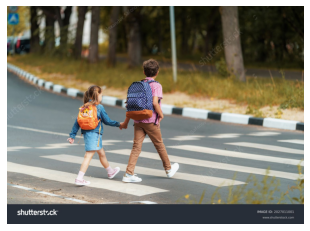

In [40]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(r"D:\photo.jpg")


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.axis('off')  
plt.show()


In [16]:
import cv2
import imutils
  

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
  
image = cv2.imread(r"D:\photo.jpg")
  
image = imutils.resize(image,
                       width=min(400, image.shape[1]))
  

(regions, _) = hog.detectMultiScale(image, 
                                    winStride=(4, 4),
                                    padding=(4, 4),
                                    scale=1.05)
  
for (x, y, w, h) in regions:
    cv2.rectangle(image, (x, y), 
                  (x + w, y + h), 
                  (0, 0, 255), 2)
 

cv2.imshow("Image", image)
cv2.waitKey(0)
  
cv2.destroyAllWindows()

In [1]:
import cv2
import imutils
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

def import_image():
    global image_path, image_label, photo_label, original_image
    image_path = filedialog.askopenfilename()
    if image_path:
        
        image_label.config(text="Image Path: " + image_path)

        
        original_image = cv2.imread(image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        
        original_image = imutils.resize(original_image, width=400)
        
        
        photo = ImageTk.PhotoImage(image=Image.fromarray(original_image))

        
        photo_label.config(image=photo)
        photo_label.image = photo

def detect_pedestrians():
    global image_path, photo_label

    if image_path:
        
        image = original_image.copy()

       
        hog = cv2.HOGDescriptor()
        hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

        
        (regions, _) = hog.detectMultiScale(image,
                                             winStride=(4, 4),
                                             padding=(4, 4),
                                             scale=1.05)

        
        for (x, y, w, h) in regions:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
   
        image = imutils.resize(image, width=original_image.shape[1])
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_pil = Image.fromarray(image_rgb)
        photo = ImageTk.PhotoImage(image=image_pil)
        photo_label.config(image=photo)
        photo_label.image = photo

root = tk.Tk()
root.title("Pedestrian Detection")

image_path = None
original_image = None

import_button = tk.Button(root, text="Import Image", command=import_image)
import_button.pack(pady=10)

image_label = tk.Label(root, text="Image Path: ")
image_label.pack(pady=5)

photo_label = tk.Label(root)
photo_label.pack()

detect_button = tk.Button(root, text="Detect Pedestrians", command=detect_pedestrians)
detect_button.pack(pady=10)

root.mainloop()